Task:

Use CNN to do handwritten digits classification using MNIST dataset.

Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN.

In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

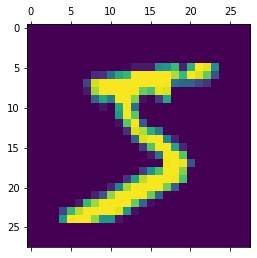

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[0]

5

In [13]:
# datascaling
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# using ANN for classification

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape= (28,28)),
                          keras.layers.Dense(100, activation= "relu"),
                          keras.layers.Dense(10, activation= "sigmoid")
])


model.compile(optimizer= "adam",
              loss= "sparse_categorical_crossentropy",
              metrics= ["accuracy"])

model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2672 - accuracy: 0.9235
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1220 - accuracy: 0.9635
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9748
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0653 - accuracy: 0.9801
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0528 - accuracy: 0.9837
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0421 - accuracy: 0.9872
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0344 - accuracy: 0.9894
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0284 - accuracy: 0.9913
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9928
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2125 - accuracy: 0.9778


[0.21248555183410645, 0.9778000116348267]

In [31]:
# reshape x 
X_train = X_train.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [32]:
X_test = X_test.reshape(-1, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

# Using CNN for classification

In [33]:
model = keras.Sequential([
                          keras.layers.Conv2D(30, (3,3), activation= "relu", input_shape=(28,28,1)),
                          keras.layers.MaxPooling2D((2,2)),

                          keras.layers.Flatten(),
                          keras.layers.Dense(100, activation = "relu"),
                          keras.layers.Dense(10, activation= "sigmoid")


])

model.compile(optimizer= "adam",
              loss = "sparse_categorical_crossentropy",
              metrics= ["accuracy"])

model.fit(X_train, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1560 - accuracy: 0.9535
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0561 - accuracy: 0.9826
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0362 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0233 - accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0168 - accuracy: 0.9948


In [34]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0455 - accuracy: 0.9856


[0.04548942670226097, 0.9855999946594238]